<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Ad_Ease_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1qQkymAitU6l2pSe702rDUhQpoP8MUZXl

Downloading...
From (original): https://drive.google.com/uc?id=1qQkymAitU6l2pSe702rDUhQpoP8MUZXl
From (redirected): https://drive.google.com/uc?id=1qQkymAitU6l2pSe702rDUhQpoP8MUZXl&confirm=t&uuid=b83777cc-460a-4845-a799-4acf184bc03c
To: /content/train_1.csv
100% 278M/278M [00:02<00:00, 123MB/s]


In [2]:
!gdown 19qvuu7E8yD63o4WkOdy_lLFSrZlZPpuE

Downloading...
From: https://drive.google.com/uc?id=19qvuu7E8yD63o4WkOdy_lLFSrZlZPpuE
To: /content/Exog_Campaign_eng
100% 1.10k/1.10k [00:00<00:00, 2.81MB/s]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Main Dataset Load

In [4]:
data = pd.read_csv("train_1.csv")

In [5]:
data.shape

(145063, 551)

In [6]:
data.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [8]:
data.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [9]:
data.Page.nunique()

145063

In [10]:
data.Page

0                   2NE1_zh.wikipedia.org_all-access_spider
1                    2PM_zh.wikipedia.org_all-access_spider
2                     3C_zh.wikipedia.org_all-access_spider
3                4minute_zh.wikipedia.org_all-access_spider
4         52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
                                ...                        
145058    Underworld_(serie_de_películas)_es.wikipedia.o...
145059    Resident_Evil:_Capítulo_Final_es.wikipedia.org...
145060    Enamorándome_de_Ramón_es.wikipedia.org_all-acc...
145061    Hasta_el_último_hombre_es.wikipedia.org_all-ac...
145062    Francisco_el_matemático_(serie_de_televisión_d...
Name: Page, Length: 145063, dtype: object

## lets separate Language, Domain,Access and Origin

In [11]:
data["Page1"] = data.Page.str.split("_").apply(lambda x : x[-3:])

In [12]:
data.Page1

0         [zh.wikipedia.org, all-access, spider]
1         [zh.wikipedia.org, all-access, spider]
2         [zh.wikipedia.org, all-access, spider]
3         [zh.wikipedia.org, all-access, spider]
4         [zh.wikipedia.org, all-access, spider]
                           ...                  
145058    [es.wikipedia.org, all-access, spider]
145059    [es.wikipedia.org, all-access, spider]
145060    [es.wikipedia.org, all-access, spider]
145061    [es.wikipedia.org, all-access, spider]
145062    [es.wikipedia.org, all-access, spider]
Name: Page1, Length: 145063, dtype: object

In [13]:
data["Domain1"] = data.Page1.apply(lambda x : x[0])
data["Access"] = data.Page1.apply(lambda x : x[1])
data["Origin"] = data.Page1.apply(lambda x : x[2])

In [14]:
data.Domain1= data.Domain1.str.split(".")

In [15]:
data.Domain1.tail(5)

145058    [es, wikipedia, org]
145059    [es, wikipedia, org]
145060    [es, wikipedia, org]
145061    [es, wikipedia, org]
145062    [es, wikipedia, org]
Name: Domain1, dtype: object

In [16]:
data["Domain"] = data.Domain1.apply(lambda x : x[1])
data["Language"] = data.Domain1.apply(lambda x : x[0])

In [17]:
data.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31', 'Page1',
       'Domain1', 'Access', 'Origin', 'Domain', 'Language'],
      dtype='object', length=557)

In [18]:
data[data.columns[-4:]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Access    145063 non-null  object
 1   Origin    145063 non-null  object
 2   Domain    145063 non-null  object
 3   Language  145063 non-null  object
dtypes: object(4)
memory usage: 4.4+ MB


In [19]:
for i in data.columns[-4:]:
  print("unique Values of",i, "are",data[i].nunique())
  print(data[i].value_counts())
  print("******************************************************************")

unique Values of Access are 3
all-access    74315
mobile-web    35939
desktop       34809
Name: Access, dtype: int64
******************************************************************
unique Values of Origin are 2
all-agents    110150
spider         34913
Name: Origin, dtype: int64
******************************************************************
unique Values of Domain are 3
wikipedia    127208
wikimedia     10555
mediawiki      7300
Name: Domain, dtype: int64
******************************************************************
unique Values of Language are 9
en         24108
ja         20431
de         18547
fr         17802
zh         17229
ru         15022
es         14069
commons    10555
www         7300
Name: Language, dtype: int64
******************************************************************


In [20]:
data[data.Language == "www"].head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Page1,Domain1,Access,Origin,Domain,Language
19611,"""Keep_me_logged_in""_extended_to_one_year_www.m...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,14.0,7.0,12.0,"[www.mediawiki.org, all-access, all-agents]","[www, mediawiki, org]",all-access,all-agents,mediawiki,www
19612,2017_wikitext_editor_www.mediawiki.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.0,43.0,100.0,73.0,"[www.mediawiki.org, all-access, all-agents]","[www, mediawiki, org]",all-access,all-agents,mediawiki,www
19613,2017_wikitext_editor/Feedback_www.mediawiki.or...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,32.0,41.0,19.0,"[www.mediawiki.org, all-access, all-agents]","[www, mediawiki, org]",all-access,all-agents,mediawiki,www
19614,API_www.mediawiki.org_all-access_all-agents,528.0,587.0,634.0,483.0,510.0,559.0,625.0,594.0,565.0,...,334.0,351.0,358.0,275.0,"[www.mediawiki.org, all-access, all-agents]","[www, mediawiki, org]",all-access,all-agents,mediawiki,www
19615,API:Account_creation_www.mediawiki.org_all-acc...,37.0,38.0,46.0,41.0,79.0,91.0,100.0,54.0,43.0,...,38.0,28.0,45.0,41.0,"[www.mediawiki.org, all-access, all-agents]","[www, mediawiki, org]",all-access,all-agents,mediawiki,www


In [21]:
data[data.Language == "commons"].head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Page1,Domain1,Access,Origin,Domain,Language
13332,Accueil_commons.wikimedia.org_all-access_spider,55.0,48.0,44.0,35.0,46.0,41.0,32.0,43.0,40.0,...,74.0,61.0,51.0,60.0,"[commons.wikimedia.org, all-access, spider]","[commons, wikimedia, org]",all-access,spider,wikimedia,commons
13333,Atlas_of_Asia_commons.wikimedia.org_all-access...,5.0,3.0,4.0,6.0,3.0,1.0,5.0,6.0,6.0,...,37.0,32.0,29.0,34.0,"[commons.wikimedia.org, all-access, spider]","[commons, wikimedia, org]",all-access,spider,wikimedia,commons
13334,Atlas_of_Europe_commons.wikimedia.org_all-acce...,4.0,6.0,9.0,7.0,6.0,4.0,5.0,6.0,13.0,...,31.0,34.0,28.0,27.0,"[commons.wikimedia.org, all-access, spider]","[commons, wikimedia, org]",all-access,spider,wikimedia,commons
13335,Atlas_of_World_War_II_commons.wikimedia.org_al...,5.0,2.0,6.0,6.0,8.0,11.0,5.0,5.0,6.0,...,13.0,5.0,11.0,6.0,"[commons.wikimedia.org, all-access, spider]","[commons, wikimedia, org]",all-access,spider,wikimedia,commons
13336,Atlas_of_colonialism_commons.wikimedia.org_all...,8.0,6.0,15.0,5.0,5.0,9.0,10.0,3.0,9.0,...,30.0,29.0,26.0,26.0,"[commons.wikimedia.org, all-access, spider]","[commons, wikimedia, org]",all-access,spider,wikimedia,commons


In [22]:
data.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31', 'Page1',
       'Domain1', 'Access', 'Origin', 'Domain', 'Language'],
      dtype='object', length=557)

In [23]:
data.isnull().sum(axis=0)

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
Domain1           0
Access            0
Origin            0
Domain            0
Language          0
Length: 557, dtype: int64

<Axes: >

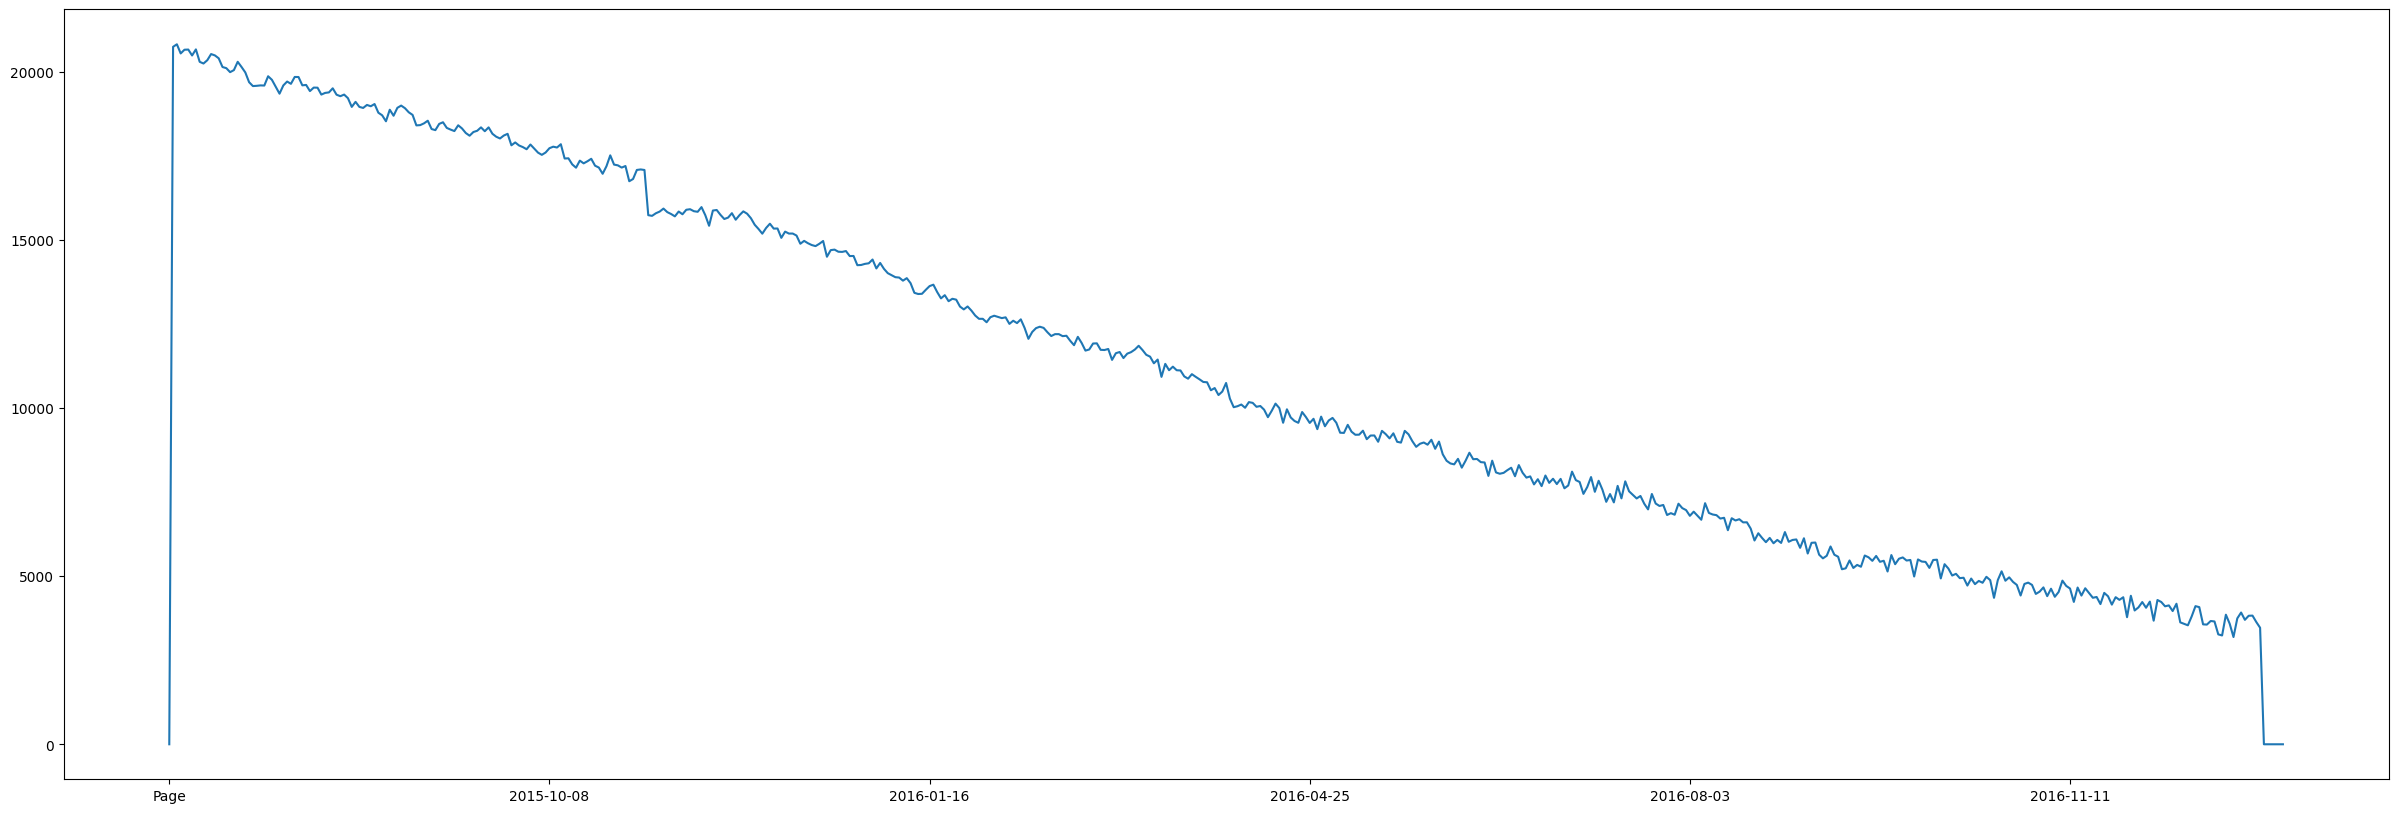

In [24]:
plt.figure(figsize=(30,10))
data.isnull().sum(axis=0).plot()

* Click rate has Increased Across all Page from 1st Day to 550th day

In [25]:
data.isnull().sum(axis=1)

0           0
1           0
2           0
3           0
4         291
         ... 
145058    544
145059    550
145060    550
145061    550
145062    550
Length: 145063, dtype: int64

<Axes: >

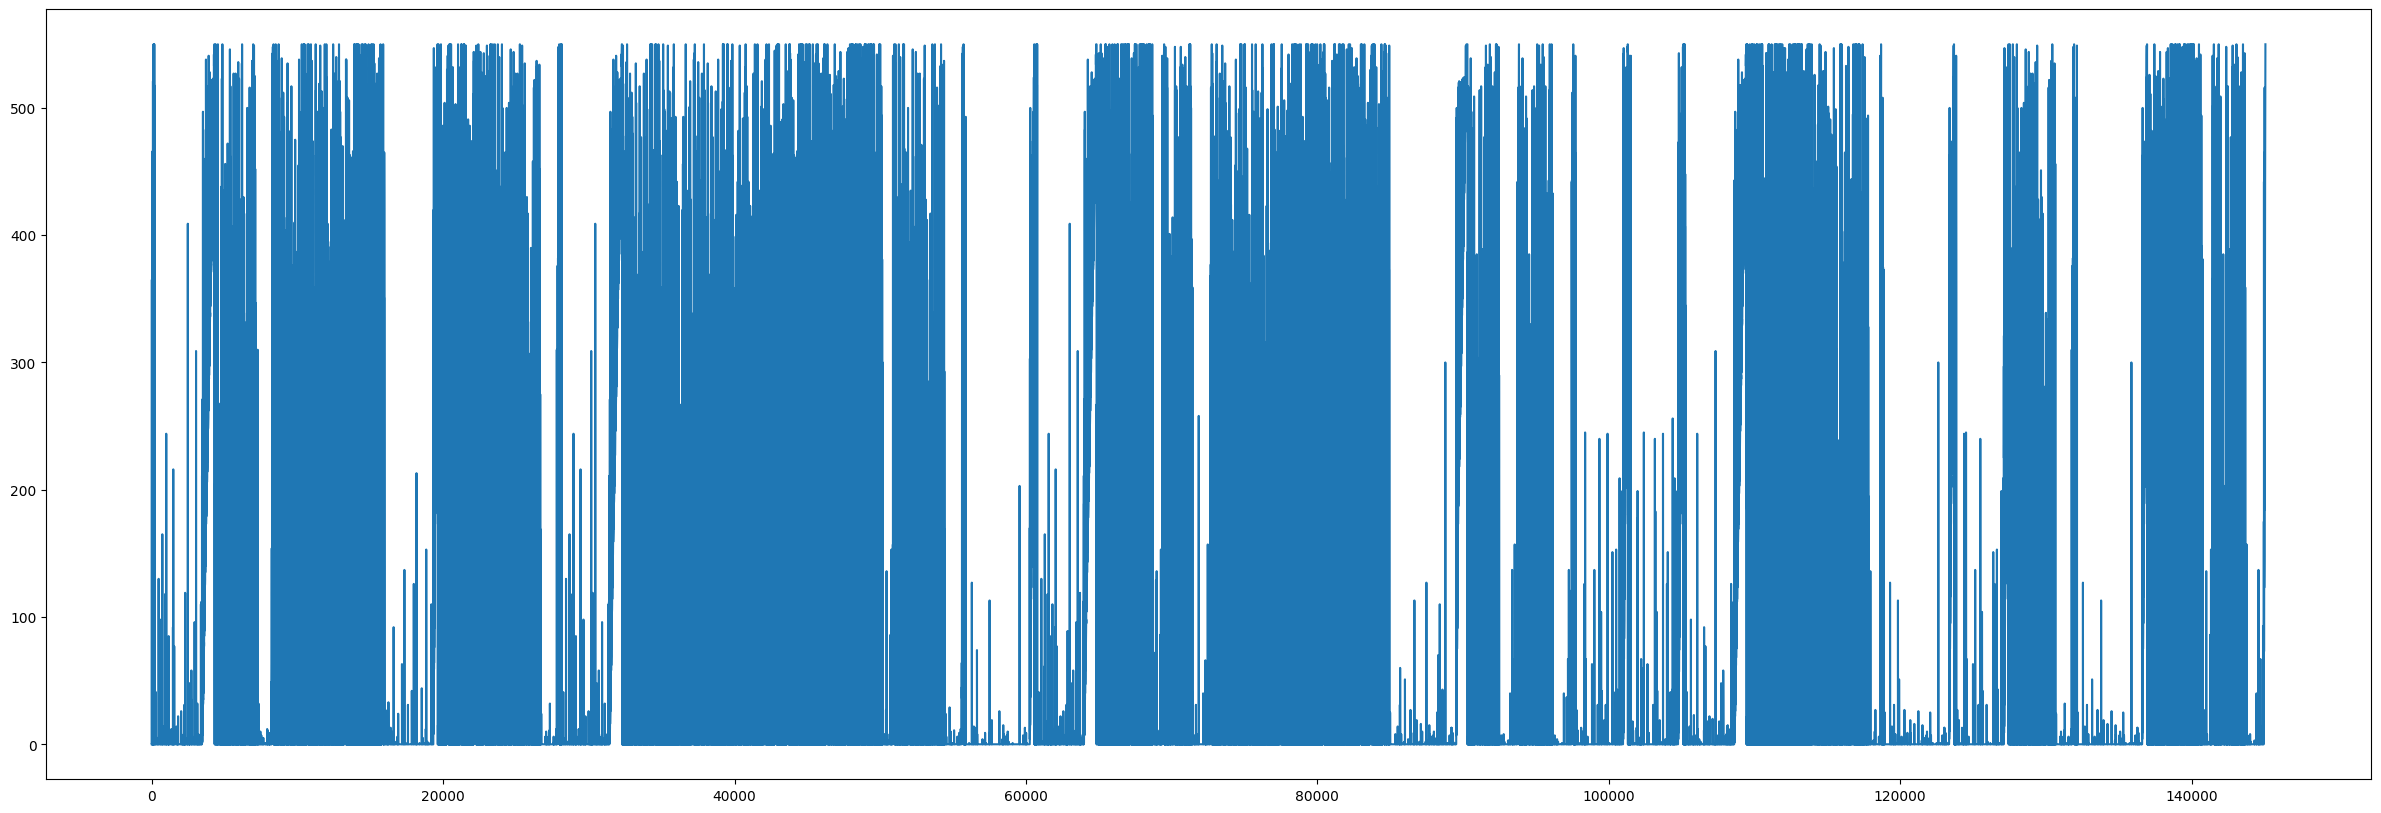

In [26]:
plt.figure(figsize=(30,10))
data.isnull().sum(axis=1).plot()

* There are Rows in whwich no clicks are avaiable at all
* They give no good information for our analysis
* lets drop those Rows

In [27]:
data = data[~(data.isnull().sum(axis=1) == 550)]

* As we have no of clicks in each date for all pages
* we will assume Nan as "Zero Clicks"
* So we will fill with "0"

In [28]:
data.fillna(0,inplace= True)

In [29]:
data.isnull().sum(axis=0).sum()

0

In [30]:
data.drop(columns=["Page","Page1","Domain1"], axis=1, inplace=True)

In [31]:
data.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Access,Origin,Domain,Language
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,14.0,20.0,22.0,19.0,18.0,20.0,all-access,spider,wikipedia,zh
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,9.0,30.0,52.0,45.0,26.0,20.0,all-access,spider,wikipedia,zh
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,all-access,spider,wikipedia,zh
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,16.0,11.0,17.0,19.0,10.0,11.0,all-access,spider,wikipedia,zh
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,11.0,27.0,13.0,36.0,10.0,all-access,spider,wikipedia,zh


In [32]:
data[data.columns[-4:]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144411 entries, 0 to 145058
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Access    144411 non-null  object
 1   Origin    144411 non-null  object
 2   Domain    144411 non-null  object
 3   Language  144411 non-null  object
dtypes: object(4)
memory usage: 5.5+ MB


In [33]:
for i in data.columns[-4:]:
  print("unique Values of",i, "are",data[i].nunique())
  print(data[i].value_counts())
  print("******************************************************************")

unique Values of Access are 3
all-access    74002
mobile-web    35813
desktop       34596
Name: Access, dtype: int64
******************************************************************
unique Values of Origin are 2
all-agents    109630
spider         34781
Name: Origin, dtype: int64
******************************************************************
unique Values of Domain are 3
wikipedia    126683
wikimedia     10477
mediawiki      7251
Name: Domain, dtype: int64
******************************************************************
unique Values of Language are 9
en         24010
ja         20340
de         18438
fr         17761
zh         17103
ru         14990
es         14041
commons    10477
www         7251
Name: Language, dtype: int64
******************************************************************


In [34]:
data.columns[:-4]

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=550)

## Group BY

* As we have seen earlier there are many missing values....so mean will not represent properly.....so to get better time forecasts.... we will take sum() aggregation in groupby

In [37]:
Language_data=data.groupby("Language")[data.columns[:-4]].sum()

In [38]:
Language_data

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
Language,,,,,,,,,,,,,,,,,,,,,
commons,1140821.0,1178130.0,1150547.0,951317.0,1058036.0,1210059.0,1261832.0,1397039.0,1211829.0,1160388.0,...,2004241.0,2398507.0,1995233.0,2414296.0,2659227.0,2305363.0,2599015.0,2309293.0,2506163.0,2177323.0
de,13260519.0,13079896.0,12554042.0,11520379.0,13392347.0,14741758.0,14296292.0,14505194.0,13964778.0,13014478.0,...,15370604.0,15561414.0,15037095.0,23760349.0,22376548.0,20125264.0,19152389.0,18447906.0,17606030.0,16562720.0
en,84712190.0,84438545.0,80167728.0,83463204.0,86198637.0,92809436.0,87838054.0,82880196.0,84798911.0,84319456.0,...,120491573.0,112905341.0,119860920.0,123926291.0,139112120.0,145628731.0,141278366.0,150557534.0,125404585.0,123623809.0
es,15278553.0,14601013.0,13427632.0,12606538.0,13710356.0,15625554.0,15230654.0,14781870.0,14502906.0,13184481.0,...,13837820.0,13155676.0,12385052.0,12713363.0,16819231.0,15945353.0,16577375.0,15647135.0,11560095.0,11077924.0
fr,8458638.0,8512952.0,8186030.0,8749842.0,8590493.0,8949799.0,8650800.0,8491533.0,8403646.0,7930703.0,...,11606988.0,11383657.0,11005480.0,11867509.0,16678423.0,15281470.0,13781521.0,13399796.0,12471074.0,11504691.0
ja,11863200.0,13620792.0,12305383.0,15456239.0,14827204.0,12920547.0,12568828.0,12492787.0,12178258.0,12652904.0,...,13793066.0,19777366.0,17501297.0,16720214.0,15918093.0,16123301.0,16150715.0,17682688.0,19450687.0,24460799.0
ru,9463854.0,9627643.0,8923463.0,8393214.0,8938528.0,9628896.0,9408180.0,9364117.0,9592309.0,10984872.0,...,13465000.0,13292086.0,13133353.0,16839517.0,16717095.0,15040168.0,14000319.0,13478977.0,12066750.0,13223033.0
www,349713.0,383680.0,325714.0,308756.0,338485.0,391895.0,433312.0,372333.0,331655.0,399316.0,...,344084.0,545587.0,510962.0,522051.0,301517.0,320017.0,729836.0,320695.0,431709.0,392930.0
zh,4144988.0,4151189.0,4123659.0,4163448.0,4441286.0,4464290.0,4459421.0,4575842.0,4547843.0,4727889.0,...,5946850.0,5865102.0,6215165.0,6569812.0,6485813.0,6478442.0,6513400.0,6042545.0,6111203.0,6298565.0


In [39]:
Language_data = Language_data.T

In [40]:
Language_data

Language,commons,de,en,es,fr,ja,ru,www,zh
2015-07-01,1140821.0,13260519.0,84712190.0,15278553.0,8458638.0,11863200.0,9463854.0,349713.0,4144988.0
2015-07-02,1178130.0,13079896.0,84438545.0,14601013.0,8512952.0,13620792.0,9627643.0,383680.0,4151189.0
2015-07-03,1150547.0,12554042.0,80167728.0,13427632.0,8186030.0,12305383.0,8923463.0,325714.0,4123659.0
2015-07-04,951317.0,11520379.0,83463204.0,12606538.0,8749842.0,15456239.0,8393214.0,308756.0,4163448.0
2015-07-05,1058036.0,13392347.0,86198637.0,13710356.0,8590493.0,14827204.0,8938528.0,338485.0,4441286.0
...,...,...,...,...,...,...,...,...,...
2016-12-27,2305363.0,20125264.0,145628731.0,15945353.0,15281470.0,16123301.0,15040168.0,320017.0,6478442.0
2016-12-28,2599015.0,19152389.0,141278366.0,16577375.0,13781521.0,16150715.0,14000319.0,729836.0,6513400.0
2016-12-29,2309293.0,18447906.0,150557534.0,15647135.0,13399796.0,17682688.0,13478977.0,320695.0,6042545.0
2016-12-30,2506163.0,17606030.0,125404585.0,11560095.0,12471074.0,19450687.0,12066750.0,431709.0,6111203.0


In [42]:
Language_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 2015-07-01 to 2016-12-31
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   commons  550 non-null    float64
 1   de       550 non-null    float64
 2   en       550 non-null    float64
 3   es       550 non-null    float64
 4   fr       550 non-null    float64
 5   ja       550 non-null    float64
 6   ru       550 non-null    float64
 7   www      550 non-null    float64
 8   zh       550 non-null    float64
dtypes: float64(9)
memory usage: 59.1+ KB


In [43]:
Language_data.columns

Index(['commons', 'de', 'en', 'es', 'fr', 'ja', 'ru', 'www', 'zh'], dtype='object', name='Language')

In [46]:
Language_data.index

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=550)

* lets change dtype of index to "datetime64"

In [49]:
idx = Language_data.index
idx.astype("datetime64")

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=550, freq=None)

In [50]:
Language_data.index = idx

<Axes: >

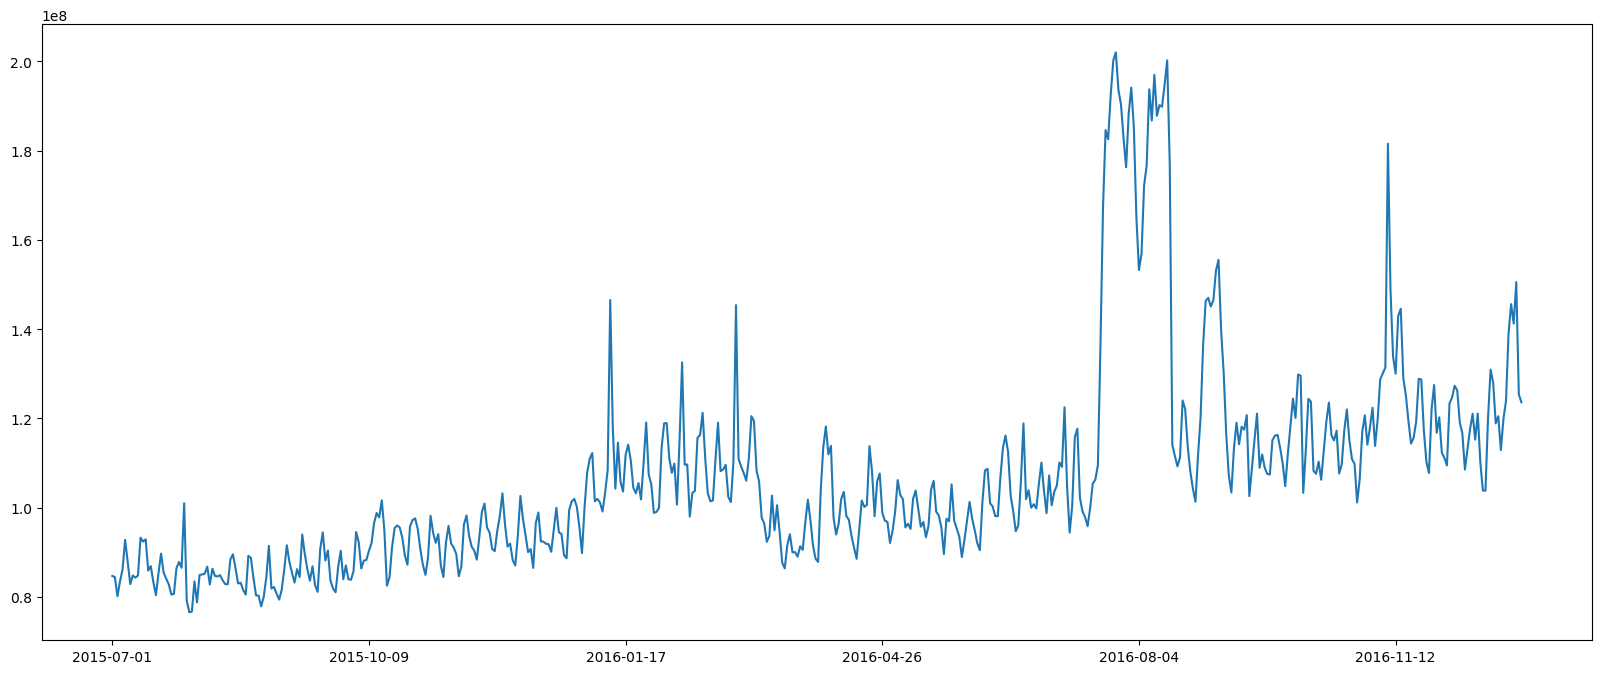

In [51]:
plt.figure(figsize=(20,8))
Language_data["en"].plot()

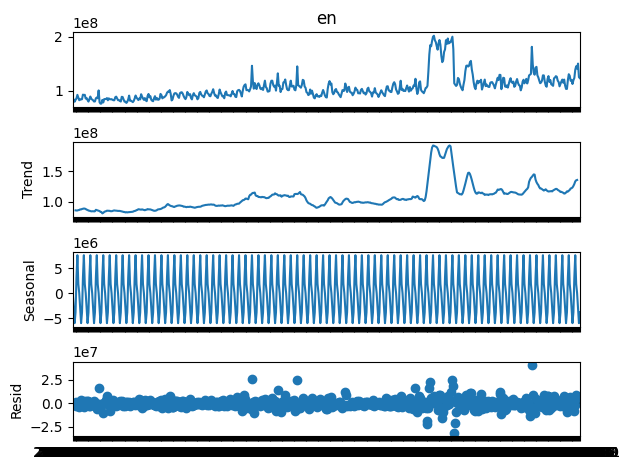

In [59]:
import statsmodels.api as sm
model = sm.tsa.seasonal_decompose(Language_data["en"], model = 'additive',period = 7)
model.plot()
plt.show()

## Exog Data load

In [ ]:
campaign = pd.read_csv("Exog_Campaign_eng")

In [ ]:
campaign.head()

In [ ]:
campaign.shape